<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_08_Seaborn%EC%8B%A4%EC%8A%B5_Iris%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.08. Seborn 실습 - 아이리스 데이터


---

* 날짜: 2022-04-20
* 이름: 박태현


## 학습내용

    - distplot을 이용해 데이터 분포를 시각화 한다.
    - jointplot을 이용해 두 변수의 분포를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)
```

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x (150, 4)
y (150,)


In [16]:
iris = pd.DataFrame(xs)
iris.columns = x_names

[y_names[i] for i in y]

iris['label'] = [y_names[i] for i in y]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
sepal_size = iris.iloc[:,0] * iris.iloc[:,1] 
petal_size = iris.iloc[:,2] * iris.iloc[:,3] # 너비 * 길이

# print(sepal_size.median())

for i in range(len(sepal_size)) : 
  if sepal_size[i] >= 17.66 :
    sepal_size[i] = 'big'
  else :
    sepal_size[i] = 'small'

# sepal_size = np.array(sepal_size > sepal_size.median(). dtype = 'int8')
# sepal_size = [['small', 'big'][i] for i in sepal_size ]

iris['sepal_size'] = sepal_size

iris
#sepal_size # 절반은 'small', 나머지는 'big'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_size
0,5.1,3.5,1.4,0.2,setosa,big
1,4.9,3.0,1.4,0.2,setosa,small
2,4.7,3.2,1.3,0.2,setosa,small
3,4.6,3.1,1.5,0.2,setosa,small
4,5.0,3.6,1.4,0.2,setosa,big
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,big
146,6.3,2.5,5.0,1.9,virginica,small
147,6.5,3.0,5.2,2.0,virginica,big
148,6.2,3.4,5.4,2.3,virginica,big


#### | 데이터 기본 탐색


In [19]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
iris.info() # 결측치가 있는지 없는지 반드시 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
 5   sepal_size         150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


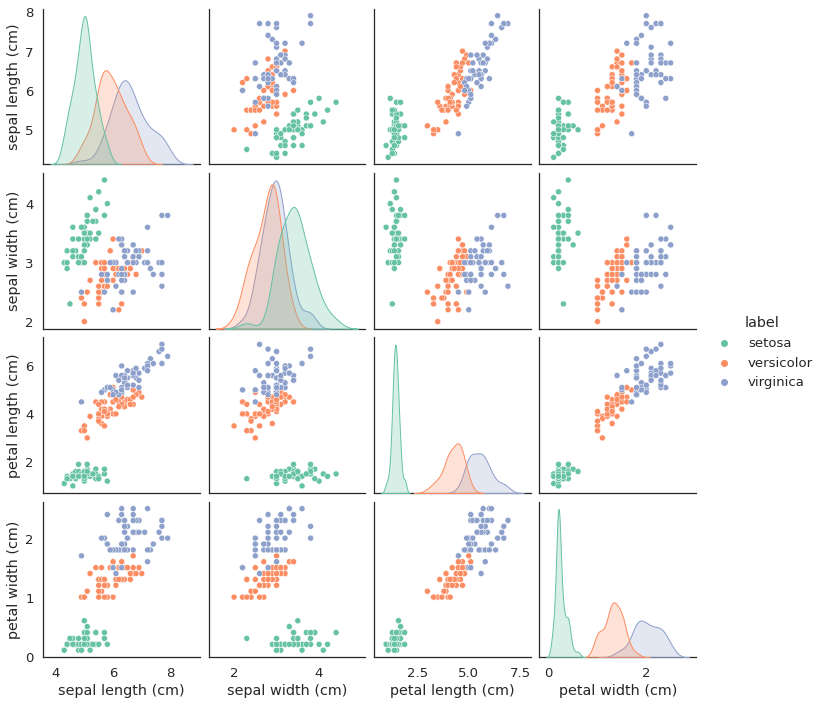

In [22]:
sns.pairplot(iris, hue = 'label')
# 구분할 것을 hue로 정하고, 이들이 가장 잘 구분되는 표로 특성을 알아낸다.
# petal_width/petal_width 와 petal_width

### (2) Distributions plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.displot(data=None, x=None, y=None, 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='hist', # {“hist”, “kde”, “ecdf”}
                rug=False, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

```

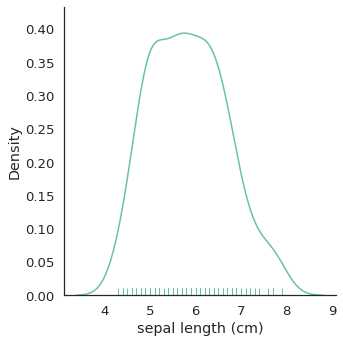

In [31]:
sns.displot(data = iris, x = x_names[0], kind = 'kde', 
            rug = True, )

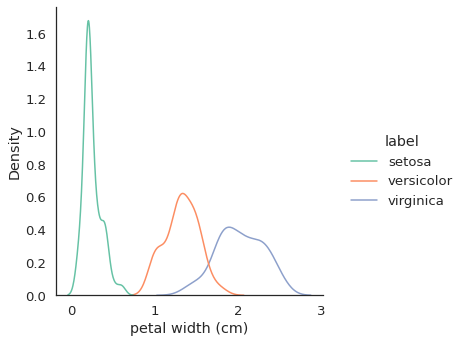

In [34]:
sns.displot(data = iris, x = x_names[-1], hue = 'label', kind = 'kde')

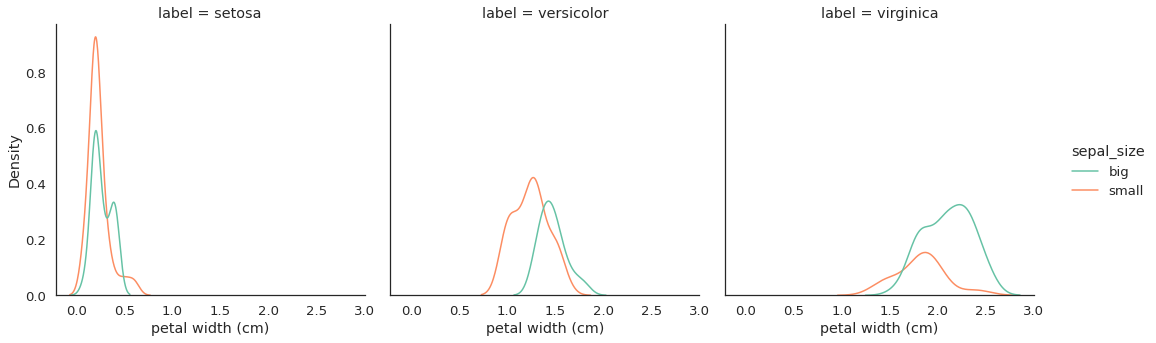

In [36]:
sns.displot(data = iris, x = x_names[-1], hue = 'sepal_size', kind = 'kde', col = 'label')

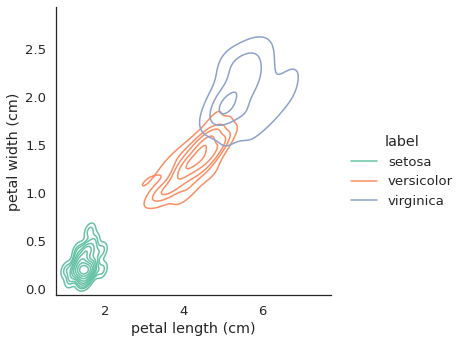

In [38]:
sns.displot(data = iris, x = x_names[2],y = x_names[3], hue = 'label',
            kind = 'kde')

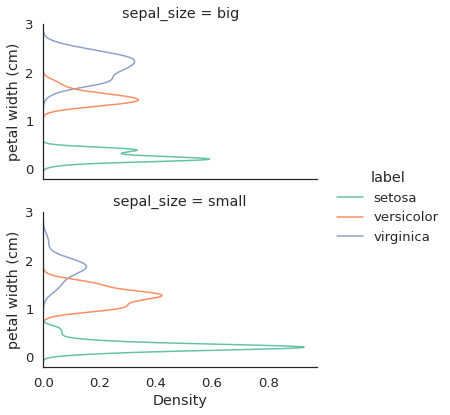

In [40]:
sns.displot(data = iris, y = x_names[3], hue = 'label',
            kind = 'kde', row = 'sepal_size', height = 3, aspect = 1.6 )

### (3) Joint plot


```
seaborn.jointplot(x=None, y=None, data=None, 
                  hue=None,
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
```

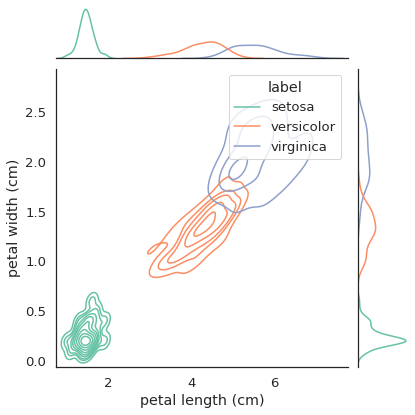

In [48]:
sns.jointplot(data = iris, x = x_names[2],y = x_names[3], hue = 'label',
              kind = 'kde')

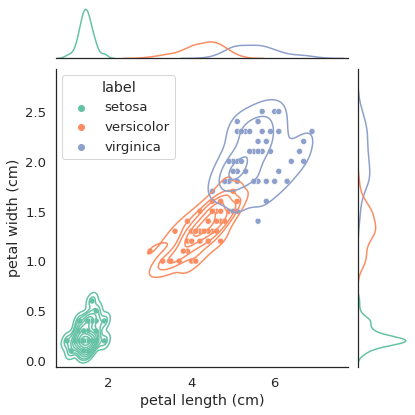

In [51]:
g = sns.jointplot(data = iris, x = x_names[2],y = x_names[3], hue = 'label',
              kind = 'kde',

              )
# 플롯에 산점도 추가
g.plot_joint(sns.scatterplot)


## **과제: [penguin dataset : The new Iris](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://imgur.com/orZWHly.png)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('penguins')
```

In [52]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### | 데이터 기본 탐색


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [61]:
df = df.dropna(axis = 0) # 결측치 있는 행 제거
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


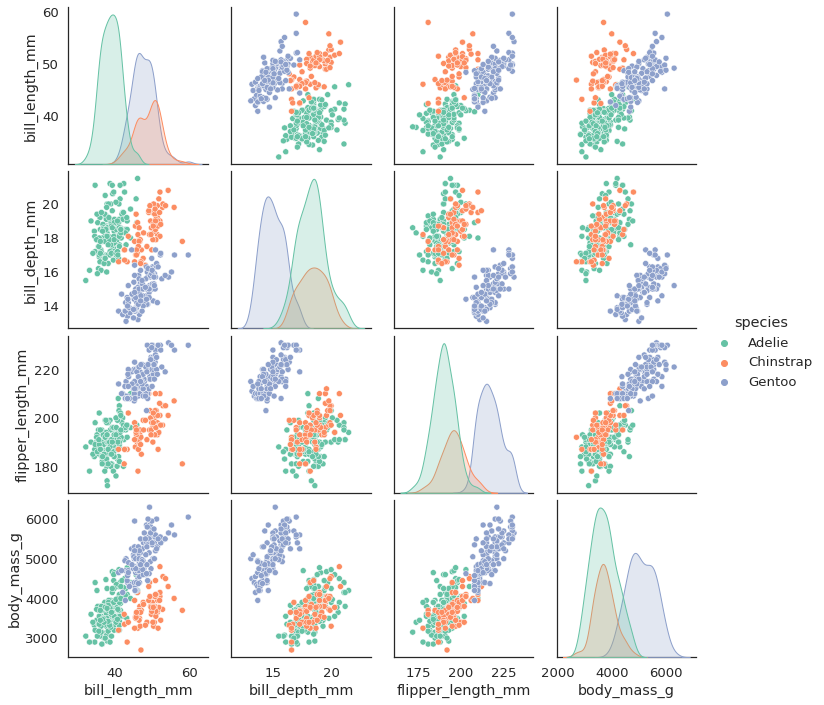

In [86]:
sns.pairplot(df, hue = 'species')

### (2) Distributions plot


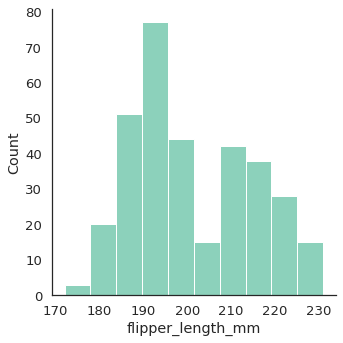

In [83]:
sns.displot(data = df, x = df.iloc[:,4], y = df.iloc[:,2],
            )

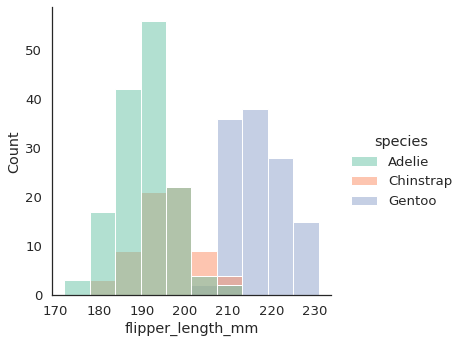

In [84]:
sns.displot(data = df, x = df.iloc[:,4], hue = 'species'
            )

### (3) Joint plot


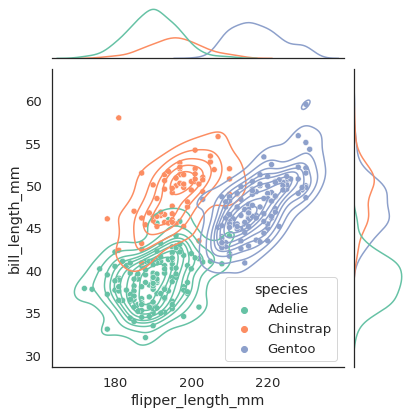

In [82]:
g = sns.jointplot(data = df, x = df.iloc[:,4], y = df.iloc[:,2],
              hue = 'species', kind = 'kde'
              )

g.plot_joint(sns.scatterplot)

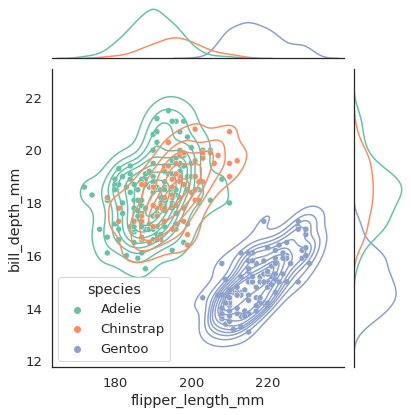

In [87]:
g = sns.jointplot(data = df, x = df.iloc[:,4], y = df.iloc[:,3],
              hue = 'species', kind = 'kde'
              )

g.plot_joint(sns.scatterplot)

기존의 변수로는 종을 구분 하기에는 조금 무리가 있으나, flipper_length와 bill_depth를 이용하면 Gentoo와 다른 두 종을 확연히 구분 할 수 있고, 

flipper_length와 bill_length로 어느정도 구분 할 수 있다.